In [1]:
import torch
print(torch.__version__)

1.3.1


In [3]:
# 测试GPU
import torch
if __name__ == '__main__':
    # 测试cuda
    print("Support CUDA?: ", torch.cuda.is_available())
    x = torch.tensor([10.0])
    x = x.cuda()
    print(x)
    y = torch.randn(2,3)
    y = y.cuda()
    z = x + y
    print(z)
    # 测试cudnn
    from torch.backends import cudnn
    print("Support cudnn?: ",cudnn.is_acceptable(x))

main()

Support CUDA?:  False


AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

In [5]:
# 2.4 Numpy与Tensor
# 2.4.1 Tensor概述
# 对大部分Tensor都是等价的，如torch.add(x,y)与x.add(y)等价
#　1）不修改自身数据，如x.add(y)，x的数据不变，返回一个新的Tensor。
#  2）修改自身数据，如x.add_(y)（运行符带下划线后缀），运算结果存在x中，x被修改
import torch
x = torch.tensor([1,2])
y = torch.tensor([3,4])
z = x.add(y)
print(z)
print('x: ', x)
x.add_(y)
print('x: ', x)

tensor([4, 6])
x:  tensor([1, 2])
x:  tensor([4, 6])


In [6]:
# 2.4.2 创建tensor
import torch
# 根据list数据生成Tensor
torch.Tensor([1,2,3,4,5,6])
# 根据形状生成Tensor
torch.Tensor(2,3)
# 根据给定的Tensor的形状
t = torch.Tensor([[1,2,3],[4,5,6]])
# 查看Tensor的形状
t.size()
# shape与size（）等价方式
t.shape
# 根据已有形状创建Tensor
torch.Tensor(t.size())

tensor([[-2.0335e-30,  4.5604e-41, -2.0334e-30],
        [ 4.5604e-41, -2.0334e-30,  4.5604e-41]])

In [7]:
# 注意torch.Tensor与torch.tensor的几点区别：
# 1）torch.Tensor是torch.empty和torch.tensor之间的一种混合，但是，当传入数据时，torch.Tensor使用全局默认dtype（FloatTensor），
#    而torch.tensor是从数据中推断数据类型。
# 2）torch.tensor(1)返回一个固定值1，而torch.Tensor(1)返回一个大小为1的张量，它是随机初始化的值

In [8]:
import torch
t1 = torch.Tensor(1)
t2 = torch.tensor(1)
print("t1的值{}，t1的数据类型{}".format(t1,t1.type()))
print("t2的值{}，t2的数据类型{}".format(t2,t2.type()))

t1的值tensor([-3.8349e-30])，t1的数据类型torch.FloatTensor
t2的值1，t2的数据类型torch.LongTensor


In [9]:
# 自动生成Tensor的例子
# 生成一个单位矩阵
torch.eye(2,2)
# 自动生成全是0的矩阵
torch.zeros(2,3)
# 根据规则生成数据
torch.linspace(1,10,4)
# 生成满足均匀分布的随机数
torch.rand(2,3)
# 生成满足标准分布的随机数
torch.randn(2,3)
# 返回所给数据形状相同，值全为0的张量
torch.zeros_like(torch.rand(2,3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [10]:
# 2.4.3修改Tensor形状
# 生成一个形状为2*3的矩阵
x = torch.randn(2,3)
# 查看矩阵的形状
x.size()
# 查看x的维度
x.dim() # 结果为2
# 把x变为3*2的矩阵
x.view(3,2)
# 把x展平为1维向量
y = x.view(-1)
y.shape
# 添加一个维度
z = torch.unsqueeze(y,0)
# 查看z的形状
z.size() #结果为torch.size([1.6])
# 计算z的元素个数
z.numel() # 结果为6

# torch.view与torch.reshpae的异同
# 1）reshape()可以由torch.reshape()，也可由torch.Tensor.reshape()调用。但view()只可由torch.Tensor.view()来调用。
# 2）对于一个将要被view的Tensor，新的size必须与原来的size与stride兼容。否则，在view之前必须调用contiguous()方法。
# 3）同样也是返回与input数据量相同，但形状不同的Tensor。若满足view的条件，则不会copy，若不满足，则会copy。
# 4）如果你只想重塑张量，请使用torch.reshape。如果你还关注内存使用情况并希望确保两个张量共享相同的数据，请使用torch.view

6

In [12]:
# 2.4.4 索引操作
import torch
# 设置一个随机种子
torch.manual_seed(100)
# 生成一个形状为2*3的矩阵
x = torch.randn(2,3)
# 根据索引获取第一行，所有数据
x[0,:]
# 获取最后一列数据
x[:,-1]
# 生成是否大于0的Byter张量
mask=x>0
# 获取大于0的值
torch.masked_select(x,mask)
# 获取非0下标，即行列索引
torch.nonzero(mask)
# 获取指定索引对应的值，输出根据以下规则得到
# out[i][j] = input[index[i][j][i]] # if dim==0
# out[i][j] = input[i][index[i][j]] # if dim==1
index = torch.LongTensor([[0,1,1]])
torch.gather(x,0,index)
index = torch.LongTensor([[0,1,1],[1,1,1]])
a = torch.gather(x,1,index)
# 把a的值返回到一个2*3的0矩阵中
z = torch.zeros(2,3)
z.scatter_(1,index,a)

tensor([[ 0.3607, -0.2859,  0.0000],
        [ 0.0000, -1.3833,  0.0000]])

In [13]:
# 2.4.5 广播机制
import numpy as np 
A = np.arange(0,40,10).reshape(4,1)
B = np.arange(0,3)
# 把ndarray转换成Tensor
A1 = torch.from_numpy(A) # 形状为4*1
B1 = torch.from_numpy(B) # 形状为3
# Tensor实现自动广播
C = A1 + B1
# 根据规则1，B1需要向A1看齐，把B变为（1,3）
B2 = B1.unsqueeze(0) # B2的形状为1*3
# 使用expand函数重复数组，分别为4*3的矩阵
A2 = A1.expand(4,3)
B3 = B2.expand(4,3)
# 然后进行相加，C1与C结果一致
C1 = A2 + B3

In [14]:
# 2.4.6 逐元素操作
import torch
t = torch.randn(1,3)
t1 = torch.randn(3,1)
t2 = torch.randn(1,3)
# t + 0.1*(t1/t2)
torch.addcdiv(t,0.1,t1,t2)
# 计算sigmoid
torch.sigmoid(t)
# 将t限制在[0,1]之间
torch.clamp(t,0,1)
# t+2进行就地计算
t.add_(2)

tensor([[1.6828, 1.1340, 3.7482]])

In [15]:
# 2.4.7归并操作
import torch
# 生成一个含6个数的向量
a = torch.linspace(0,10,6)
print(a)
# 使用view方法，把a变为2*3矩阵
a = a.view((2,3))
# 沿着y轴方向累加，即dim=0
b = a.sum(dim=0) # b的形状为[3]
# 沿着y轴方向累加，即dim=0，并保留含1的维度
b = a.sum(dim=0, keepdim=True) # b的形状为【1,3】

tensor([ 0.,  2.,  4.,  6.,  8., 10.])


In [18]:
x = torch.linspace(0,10,6).view(2,3)
# 求所有元素的最大值
torch.max(x) # 结果为10
# 求y轴方向的最大值
torch.max(x,dim=0) # 结果为【6,10,8】
# 求指定维度最大的元素
torch.topk(x,1,dim=0)

torch.return_types.topk(
values=tensor([[ 6.,  8., 10.]]),
indices=tensor([[1, 1, 1]]))

In [20]:
# 1）Torch的dot与Numpy的dot有点不同，Torch中的dot是对两个为1D张量进行点积运算，Numpy中的dot无此限制。
# 2）mm是对2D的矩阵进行点积，bmm对含batch的3D进行点积运算。
# 3）转置运算会导致存储空间不连续，需要调用contiguous方法转为连续。
import torch
a = torch.tensor([2,3])
b = torch.tensor([3,4])
torch.dot(a,b) # 结果为18
x = torch.randint(10,(2,3))
print(x)
y = torch.randint(6,(3,4))
print(y)
torch.mm(x,y)

tensor([[7, 9, 2],
        [6, 7, 7]])
tensor([[0, 3, 0, 5],
        [3, 1, 4, 4],
        [3, 0, 0, 5]])


tensor([[33, 30, 36, 81],
        [42, 25, 28, 93]])

In [22]:
x = torch.randint(10,(2,2,3))
print(x)
y = torch.randint(6,(2,3,4))
print(y)
torch.bmm(x,y)

tensor([[[5, 6, 9],
         [2, 3, 1]],

        [[0, 2, 1],
         [2, 7, 9]]])
tensor([[[2, 4, 2, 0],
         [2, 4, 5, 4],
         [3, 5, 0, 5]],

        [[4, 0, 4, 0],
         [0, 2, 3, 2],
         [1, 5, 2, 4]]])


tensor([[[49, 89, 40, 69],
         [13, 25, 19, 17]],

        [[ 1,  9,  8,  8],
         [17, 59, 47, 50]]])

In [1]:
# 2.5Tensor与Autograd
# 2.5.3 标量反向传播
# （1）定义叶子节点及算子节点
import torch
# 定义输入张量x
x = torch.Tensor([2])
# 初始化权重参数W，偏移量b，并设置为require_grad属性为True，为自动求导
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
# 实现前向传播
y = torch.mul(w,x) # 等价于w*x
z = torch.add(y,b) # 等价于y+b
# 查看x，w，b子节点的require_grad属性
print("x,w,b的require_grad属性分别为：{}，{}，{}".format(x.requires_grad,w.requires_grad,b.requires_grad))

x,w,b的require_grad属性分别为：False，True，True


In [2]:
# 查看叶子节点，非叶子节点的其他属性
print("y,z的requires_grad属性分别为：{}，{}".format(y.requires_grad,z.requires_grad))

y,z的requires_grad属性分别为：True，True


In [3]:
# 查看各节点是否是叶子节点
print("x,w,b,y,z是否是叶子节点：{}，{}，{}，{}，{}".format(x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf))

x,w,b,y,z是否是叶子节点：True，True，True，False，False


In [6]:
# 查看叶子节点的grad_fn属性
# x,w,b是用户创建的，是通过其他张量计算得到的
print("x,y,b的grad_fn属性：{}，{}，{}".format(x.grad_fn,w.grad_fn,b.grad_fn))

x,y,b的grad_fn属性：None，None，None


In [7]:
# 查看非叶子节点的grad_fn属性
print("y,z的grad_fn属性：{}，{}".format(y.grad_fn,z.grad_fn))

y,z的grad_fn属性：<MulBackward0 object at 0x7fa3a0561950>，<AddBackward0 object at 0x7fa3a05613d0>


In [48]:
# 2.5.4 非标量反向传播
# 定义叶子节点及计算节点
import torch
# 定义叶子节点张量x，形状为1*2
x = torch.tensor([[2,3]],dtype=torch.float,requires_grad=True)
# 初始化Jacobian矩阵
J = torch.zeros(2,2)
# 初始化目标张量，形状为1*2
y = torch.zeros(1,2)
# 定义y与x之间的映射关系
y[0,0] = x[0,0]**2 + 3*x[0,1]
y[0,1] = x[0,1]**2 + 2*x[0,0]

In [29]:
# (2)手工计算y对x的梯度
# 调用backward来获取y对x的梯度
#y.backward(torch.Tensor([[1,1]]))
#print(x.grad)

tensor([[6., 9.]])


In [49]:
# 生成y1对x的梯度
y.backward(torch.Tensor([[1,0]]),retain_graph=True)
J[0] = x.grad
# 梯度是累加的，需要对x的梯度清零
x.grad = torch.zeros_like(x.grad)
# 生成y2对x的梯度
y.backward(torch.Tensor([[0,1]]))
J[1] = x.grad
# 显示jacobian矩阵的值
print(J)
# 有错

tensor([[4., 3.],
        [2., 6.]])


In [33]:
# 使用Numpy实现机器学习
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [34]:
# 生成输入数据x及目标数据y
np.random.seed(100)
x = np.linspace(-1,1,100).reshape(100,1)
y = 3*np.power(x,2)+2+0.2*np.random.randn(x.size).reshape(100,1)

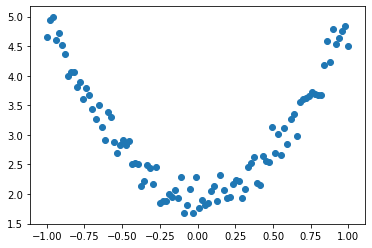

In [35]:
# 画图
plt.scatter(x,y)
plt.show()

In [36]:
# 初始化权重参数
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1)

In [38]:
# 训练模型
lr = 0.001
for i in range(800):
    # 前向传播
    y_pred = np.power(x,2)*w1 + b1
    # 定义损失函数
    loss = 0.5*(y_pred - y)**2
    loss = loss.sum()
    # 计算梯度
    grad_w = np.sum((y_pred - y)*np.power(x,2))
    grad_b = np.sum((y_pred - y))
    # 使用梯度下降法，使得loss最小
    w1 -= lr*grad_w
    b1 -= lr*grad_b

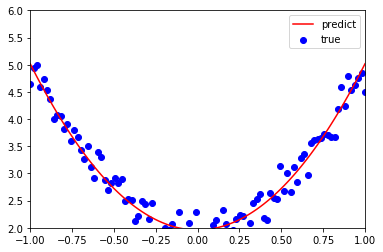

[[3.05792438]] [[1.95954387]]


In [39]:
# 可视化结果
plt.plot(x,y_pred,'r-',label='predict')
plt.scatter(x,y,color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()
print(w1,b1)

In [40]:
# 2.7使用Tensor以及ANtograd实现机器学习
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt

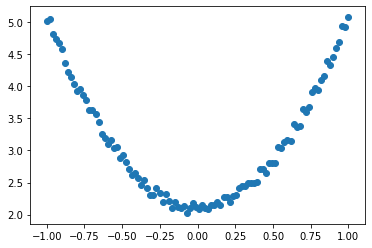

In [44]:
# 生成训练数据，并可视化数据分布情况
t.manual_seed(100)
dtype = t.float
# 生成x坐标数据，x为tensor
x = t.unsqueeze(torch.linspace(-1,1,100),dim=1)
# 生成y坐标数据，y为tensor，另外加上噪声
y = 3*x.pow(2) +2+0.2*torch.rand(x.size())
# 画图，把tensor转换成numpy数据
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [45]:
# 初始化权重参数
# 随机初始化，w，b为需要学习的，所以requires_grad = True
w = t.randn(1,1,dtype=dtype,requires_grad=True)
b = t.zeros(1,1,dtype=dtype,requires_grad=True)

In [46]:
# 训练模型
lr = 0.001
for ii in range (800):
    # 前向传播，并定义损失函数loss
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5*(y_pred-y)**2
    loss = loss.sum()
    # 自动计算梯度，梯度存放在grad属性中
    loss.backward()
    # 手动更新参数，需要用到torch.no_grad(),使上下文环境切断自动求导计算
    with t.no_grad():
        w-=lr*w.grad
        b-=lr*b.grad
        # 梯度清零
        w.grad.zero_()
        b.grad.zero_()

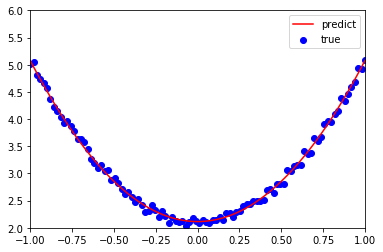

tensor([[2.9645]], requires_grad=True) tensor([[2.1146]], requires_grad=True)


In [47]:
# 可视化结果
# detach所做的就是,重新声明一个变量,指向原变量的存放位置,
# 但是requires_grad为false.更深入一点的理解是,计算图从detach过的变量这里就断了, 
# 它变成了一个leaf_node.即使之后重新将它的requires_node置为true,它也不会具有梯度

plt.plot(x.numpy(),y_pred.detach().numpy(),'r-',label='predict')
plt.scatter(x.numpy(),y.numpy(),color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()
print(w,b)